In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint as pp
import csv
import datetime
from dateutil.parser import parse
from pandas.tools.plotting import scatter_matrix
from patsy import dmatrices
import statsmodels.formula.api as smf
from sklearn import cross_validation
from sklearn import datasets
from sklearn import svm
import seaborn as sns
import statsmodels.api as sm
import matplotlib as mpl
from numpy.random import randn
from scipy import stats
from pprint import pprint as pp
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.learning_curve import learning_curve
from sklearn.cross_validation import cross_val_score
import urllib2

%matplotlib inline

sns.set_palette("deep", desat=.8)
sns.set_context(rc={"figure.figsize": (14, 8)})

In [37]:
# Chalenge 1

congressrl = "https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data"

def get_data(url):
    newrl = urllib2.urlopen(url)
    return pd.read_csv(newrl, header=-1)

def challenge_one():
    df            = get_data(congressrl)
    df            = df.replace(['y'], [1])
    df            = df.replace(['n'], [0])
    df = df.replace("?", np.nan)

    for num in list(xrange(1,17)):
        df[num] = df[num].replace(np.nan, df[num].mean())

    return df


df = challenge_one()
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,0.00000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,1.000000,0.362319,1.000000,1.000000,1.000000,0.000000,1.000000
1,republican,0.00000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.812689
2,democrat,0.44208,1.000000,1.000000,0.417453,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
3,democrat,0.00000,1.000000,1.000000,0.000000,0.504762,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
4,democrat,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.423267,1.000000,1.000000,1.000000,1.000000
5,democrat,0.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
6,democrat,0.00000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.509756,1.000000,1.000000,1.000000
7,republican,0.00000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.427518,1.000000
8,republican,0.00000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
9,democrat,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.427518,0.812689


In [3]:
model                   = LogisticRegression()
x_all                   = df.iloc[:,1:]
y_all                   = df.iloc[:,0]
train, test     = train_test_split(df, train_size = 0.8)


In [39]:
x_train  = train.iloc[:,1:]
y_train  = train.iloc[:,0]
x_test   = test.iloc[:,1:]
y_test   = test.iloc[:,0]

In [5]:
model.fit(x_train, y_train)
y_pred  = model.predict(x_test)
a_score = accuracy_score(y_test, y_pred)
print "Accuracy is:"
a_score

Accuracy is:


0.95402298850574707

In [6]:
stuff = precision_recall_fscore_support(y_test, y_pred)
print "Precision is:"
stuff[0][0]

Precision is:


0.95999999999999996

In [7]:
print "Recall is:"
stuff[1][0]

Recall is:


0.95999999999999996

In [8]:
print "F1 is:"
stuff[2][0]

F1 is:


0.95999999999999996

In [9]:
model = KNeighborsClassifier(n_neighbors=16)
model.fit(x_train, y_train)
y_pred  = model.predict(x_test)
a_score = accuracy_score(y_test, y_pred)
print "Accuracy is:"
a_score

Accuracy is:


0.93103448275862066

In [10]:
stuff = precision_recall_fscore_support(y_test, y_pred)
print "Precision is:"
stuff[0][0]

Precision is:


0.93999999999999995

In [11]:
print "Recall is:"
stuff[1][0]

Recall is:


0.93999999999999995

In [12]:
print "F1 is:"
stuff[2][0]

F1 is:


0.93999999999999995

In [13]:
model   = LogisticRegression()
model.fit(x_train, y_train)
y_pred  = model.predict(x_test)
a_score = accuracy_score(y_test, y_pred)
print "Accuracy is:"
a_score

Accuracy is:


0.95402298850574707

In [14]:
stuff = precision_recall_fscore_support(y_test, y_pred)
print "Precision is:"
stuff[0][0]

Precision is:


0.95999999999999996

In [15]:
print "Recall is:"
stuff[1][0]

Recall is:


0.95999999999999996

In [16]:
print "F1 is:"
stuff[2][0]

F1 is:


0.95999999999999996

In [17]:
model                   = GaussianNB()
model.fit(x_train, y_train)
y_pred  = model.predict(x_test)
a_score = accuracy_score(y_test, y_pred)
stuff = precision_recall_fscore_support(y_test, y_pred)
print "Accuracy is:"
print a_score
print "Precision is:"
print stuff[0][0]
print "Recall is:"
print stuff[1][0]
print "F1 is:"
print stuff[2][0]

Accuracy is:
0.931034482759
Precision is:
0.94
Recall is:
0.94
F1 is:
0.94


In [18]:
from sklearn.svm import SVC
model                   = SVC()
model.fit(x_train, y_train)
y_pred  = model.predict(x_test)
a_score = accuracy_score(y_test, y_pred)
stuff = precision_recall_fscore_support(y_test, y_pred)
print "Accuracy is:"
print a_score
print "Precision is:"
print stuff[0][0]
print "Recall is:"
print stuff[1][0]
print "F1 is:"
print stuff[2][0]

Accuracy is:
0.942528735632
Precision is:
0.959183673469
Recall is:
0.94
F1 is:
0.949494949495


In [19]:
from sklearn.tree import DecisionTreeClassifier

model                   = DecisionTreeClassifier()

model.fit(x_train, y_train)
y_pred  = model.predict(x_test)
a_score = accuracy_score(y_test, y_pred)
stuff = precision_recall_fscore_support(y_test, y_pred)
print "Accuracy is:"
print a_score
print "Precision is:"
print stuff[0][0]
print "Recall is:"
print stuff[1][0]
print "F1 is:"
print stuff[2][0]

Accuracy is:
0.954022988506
Precision is:
0.979166666667
Recall is:
0.94
F1 is:
0.959183673469


In [20]:
from sklearn.ensemble import RandomForestClassifier

model                   = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred  = model.predict(x_test)
a_score = accuracy_score(y_test, y_pred)
stuff = precision_recall_fscore_support(y_test, y_pred)
print "Accuracy is:"
print a_score
print "Precision is:"
print stuff[0][0]
print "Recall is:"
print stuff[1][0]
print "F1 is:"
print stuff[2][0]

Accuracy is:
0.965517241379
Precision is:
0.979591836735
Recall is:
0.96
F1 is:
0.969696969697


In [36]:
# Challenge 2
x_all                   = df.iloc[:,1:]
y_all                   = df.iloc[:,0]
train, test     = train_test_split(df, train_size = 0.8)
x_train  = train.iloc[:,1:]
y_train  = train.iloc[:,0]
x_test   = test.iloc[:,1:]
y_test   = test.iloc[:,0]
df.head()

,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


AUC is: 0.998272


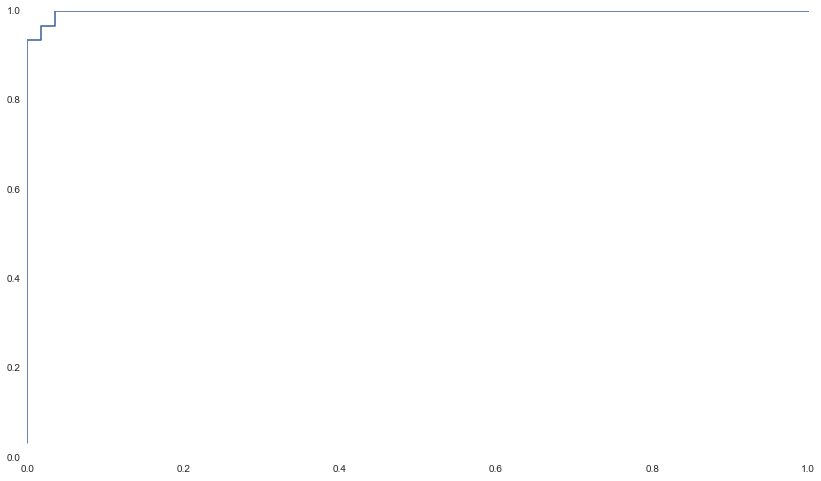

In [22]:
model                   = LogisticRegression()
probas_ = model.fit(x_train, y_train)
y_pred_proba  = model.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1], pos_label="republican")
roc_auc = auc(fpr, tpr)
print "AUC is: %f" % roc_auc
plt.clf()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)

AUC is: 0.956221


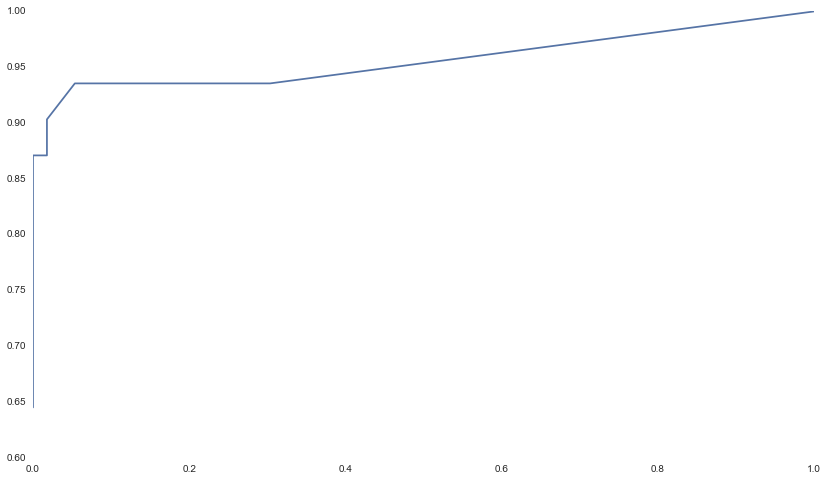

In [23]:
model = KNeighborsClassifier(n_neighbors=16)
probas_ = model.fit(x_train, y_train)
y_pred_proba  = model.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1], pos_label="republican")
roc_auc = auc(fpr, tpr)
print "AUC is: %f" % roc_auc
plt.clf()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)

AUC is: 0.966590


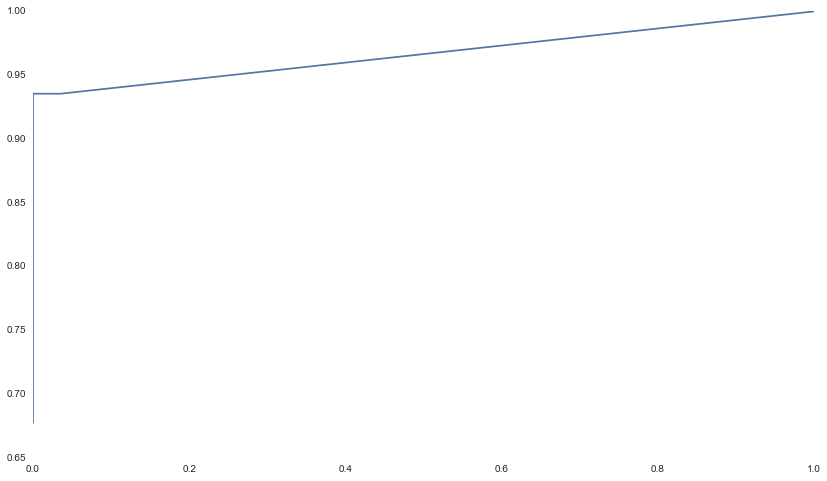

In [24]:
model                   = GaussianNB()
probas_ = model.fit(x_train, y_train)
y_pred_proba  = model.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1], pos_label="republican")
roc_auc = auc(fpr, tpr)
print "AUC is: %f" % roc_auc
plt.clf()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)

AUC is: 0.998848


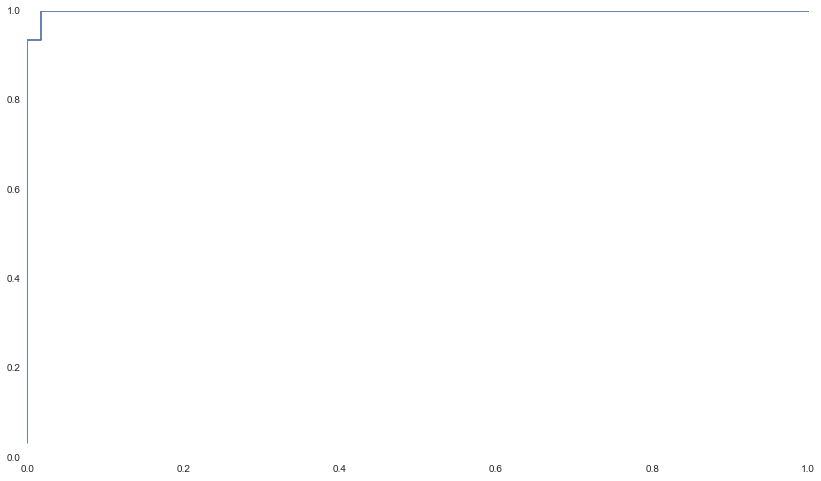

In [25]:
model                   = SVC(kernel="linear", probability=True)
probas_ = model.fit(x_train, y_train)
y_pred_proba  = model.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1], pos_label="republican")
roc_auc = auc(fpr, tpr)
print "AUC is: %f" % roc_auc
plt.clf()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)

AUC is: 0.908698


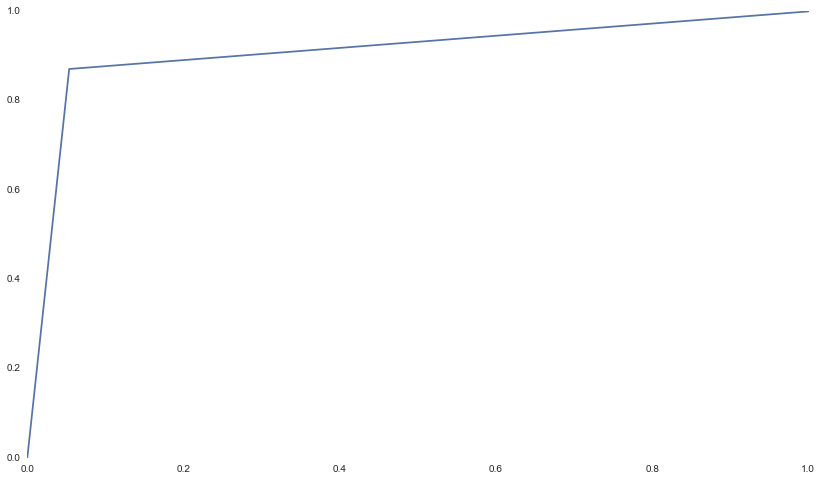

In [26]:
model                   = DecisionTreeClassifier()
probas_ = model.fit(x_train, y_train)
y_pred_proba  = model.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1], pos_label="republican")
roc_auc = auc(fpr, tpr)
print "AUC is: %f" % roc_auc
plt.clf()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)

AUC is: 0.979263


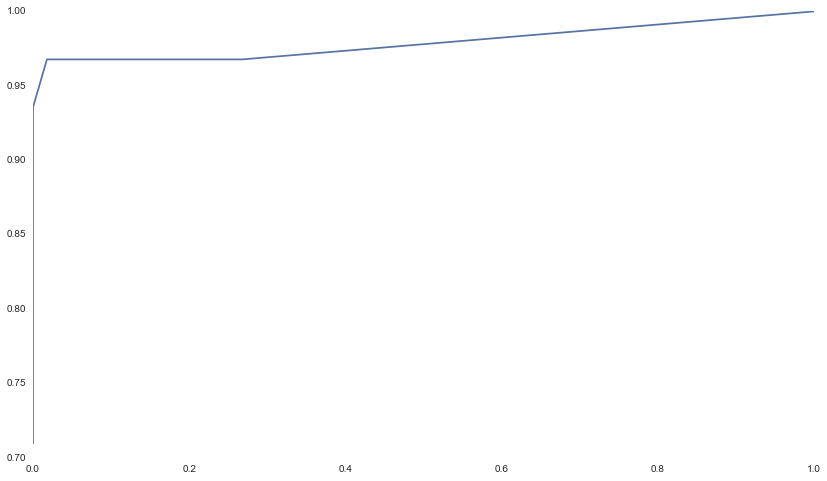

In [27]:
model                   = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred_proba  = model.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1], pos_label="republican")
roc_auc = auc(fpr, tpr)
print "AUC is: %f" % roc_auc
plt.clf()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)

In [28]:
# Challenge 3
from sklearn import metrics, preprocessing

df = challenge_one()
df = df.replace(['democrat', 'republican'], [0,1])
x_all                   = df.iloc[:,1:]
y_all                   = df.iloc[:,0]
model = LogisticRegression()
avg_acc = np.mean(cross_val_score(model, x_all, y_all, scoring='recall'))
avg_precision = np.mean(cross_val_score(model, x_all, y_all, scoring='precision'))
avg_recall = np.mean(cross_val_score(model, x_all, y_all, scoring='recall'))
avg_f1 = np.mean(cross_val_score(model, x_all, y_all, scoring='f1'))
print "Accuracy: %f" % avg_acc
print "Precision: %f" % avg_precision
print "Recall: %f" % avg_recall
print "F1: %f" % avg_f1

Accuracy: 0.952381
Precision: 0.949399
Recall: 0.952381
F1: 0.950059


In [29]:
model = GaussianNB()
avg_acc = np.mean(cross_val_score(model, x_all, y_all, scoring='recall'))
avg_precision = np.mean(cross_val_score(model, x_all, y_all, scoring='precision'))
avg_recall = np.mean(cross_val_score(model, x_all, y_all, scoring='recall'))
avg_f1 = np.mean(cross_val_score(model, x_all, y_all, scoring='f1'))
print "Accuracy: %f" % avg_acc
print "Precision: %f" % avg_precision
print "Recall: %f" % avg_recall
print "F1: %f" % avg_f1

Accuracy: 0.916667
Precision: 0.908613
Recall: 0.916667
F1: 0.911185


In [30]:
model = SVC()
avg_acc = np.mean(cross_val_score(model, x_all, y_all, scoring='recall'))
avg_precision = np.mean(cross_val_score(model, x_all, y_all, scoring='precision'))
avg_recall = np.mean(cross_val_score(model, x_all, y_all, scoring='recall'))
avg_f1 = np.mean(cross_val_score(model, x_all, y_all, scoring='f1'))
print "Accuracy: %f" % avg_acc
print "Precision: %f" % avg_precision
print "Recall: %f" % avg_recall
print "F1: %f" % avg_f1

Accuracy: 0.964286
Precision: 0.922271
Recall: 0.964286
F1: 0.942184


In [31]:
model = DecisionTreeClassifier()
avg_acc = np.mean(cross_val_score(model, x_all, y_all, scoring='recall'))
avg_precision = np.mean(cross_val_score(model, x_all, y_all, scoring='precision'))
avg_recall = np.mean(cross_val_score(model, x_all, y_all, scoring='recall'))
avg_f1 = np.mean(cross_val_score(model, x_all, y_all, scoring='f1'))
print "Accuracy: %f" % avg_acc
print "Precision: %f" % avg_precision
print "Recall: %f" % avg_recall
print "F1: %f" % avg_f1

Accuracy: 0.934524
Precision: 0.924660
Recall: 0.940476
F1: 0.935148


In [32]:
model = RandomForestClassifier()
avg_acc = np.mean(cross_val_score(model, x_all, y_all, scoring='recall'))
avg_precision = np.mean(cross_val_score(model, x_all, y_all, scoring='precision'))
avg_recall = np.mean(cross_val_score(model, x_all, y_all, scoring='recall'))
avg_f1 = np.mean(cross_val_score(model, x_all, y_all, scoring='f1'))
print "Accuracy: %f" % avg_acc
print "Precision: %f" % avg_precision
print "Recall: %f" % avg_recall
print "F1: %f" % avg_f1

Accuracy: 0.952381
Precision: 0.941765
Recall: 0.928571
F1: 0.949336


In [33]:
model = KNeighborsClassifier(n_neighbors=16)
avg_acc = np.mean(cross_val_score(model, x_all, y_all, scoring='recall'))
avg_precision = np.mean(cross_val_score(model, x_all, y_all, scoring='precision'))
avg_recall = np.mean(cross_val_score(model, x_all, y_all, scoring='recall'))
avg_f1 = np.mean(cross_val_score(model, x_all, y_all, scoring='f1'))
print "Accuracy: %f" % avg_acc
print "Precision: %f" % avg_precision
print "Recall: %f" % avg_recall
print "F1: %f" % avg_f1

Accuracy: 0.940476
Precision: 0.878050
Recall: 0.940476
F1: 0.908025


AUC is: 0.671895


,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


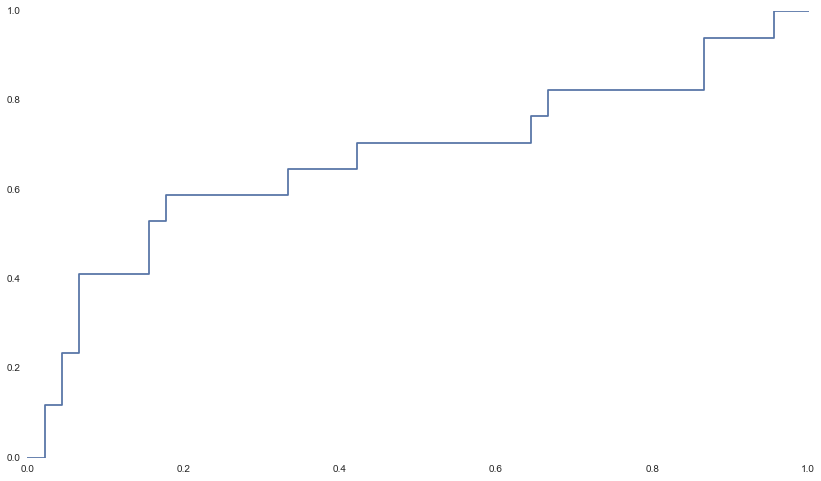

In [41]:
# Challenge 5

healthrl="https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data"
df=get_data(healthrl)


train, test     = train_test_split(df, train_size = 0.8)

x_train  = train.iloc[:,0:3]
y_train  = train.iloc[:,3]
x_test   = test.iloc[:,0:3]
y_test   = test.iloc[:,3]


model    = LogisticRegression()

model.fit(x_train, y_train)
y_pred_proba  = model.predict_proba(x_test)
y_pred_proba
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1], pos_label=2)
roc_auc = auc(fpr, tpr)
print "AUC is: %f" % roc_auc
plt.clf()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)